In [7]:
import os
import os.path
import sys
import math

In [21]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.abspath('../dependencies/BristolStockExchange'))
sys.path.append(os.path.abspath('..'))

In [3]:
import BSE

# Simulation

In [4]:
        # set up parameters for the session

        start_time = 0.0
        end_time = 600.0
        duration = end_time - start_time


        # schedule_offsetfn returns time-dependent offset on schedule prices
        def schedule_offsetfn(t):
                pi2 = math.pi * 2
                c = math.pi * 3000
                wavelength = t / c
                gradient = 100 * t / (c / pi2)
                amplitude = 100 * t / (c / pi2)
                offset = gradient + amplitude * math.sin(wavelength * t)
                return int(round(offset, 0))
                
                

# #        range1 = (10, 190, schedule_offsetfn)
# #        range2 = (200,300, schedule_offsetfn)

# #        supply_schedule = [ {'from':start_time, 'to':duration/3, 'ranges':[range1], 'stepmode':'fixed'},
# #                            {'from':duration/3, 'to':2*duration/3, 'ranges':[range2], 'stepmode':'fixed'},
# #                            {'from':2*duration/3, 'to':end_time, 'ranges':[range1], 'stepmode':'fixed'}
# #                          ]



        range1 = (95, 95, schedule_offsetfn)
        supply_schedule = [ {'from':start_time, 'to':end_time, 'ranges':[range1], 'stepmode':'fixed'}
                          ]

        range1 = (105, 105, schedule_offsetfn)
        demand_schedule = [ {'from':start_time, 'to':end_time, 'ranges':[range1], 'stepmode':'fixed'}
                          ]

        order_sched = {'sup':supply_schedule, 'dem':demand_schedule,
                       'interval':30, 'timemode':'drip-poisson'}


In [32]:
# Traders other than us
def add_other_traders(traders):
    buyers_spec = [('GVWY', 4), ('SHVR', 4),
                   ('ZIC', 4), ('ZIP', 4)]
    sellers_spec = buyers_spec
    traders_spec = {'sellers':sellers_spec, 'buyers':buyers_spec}
    trader_stats = BSE.populate_market(traders_spec, traders, True, True)
    return trader_stats

In [17]:
class LoggerTrader(BSE.Trader):
    def __init__(self, tid):
        super(LoggerTrader, self).__init__('LoggerTrader', tid, 0)
        self.log = []
        
    def respond(self, time, lob, trade, verbose):
        self.log.append((time, lob.copy(), trade))
        
    def getorder(self, time, time_left, lob):
        return None

In [96]:
# Simulation
def market_data():
    logger = LoggerTrader('L01')
    traders = {'L01': logger}
    trader_stats = add_other_traders(traders)
    BSE.market_session('trial_id', start_time, end_time, traders, trader_stats,
                       order_sched, False)
    return logger.log


In [97]:
log = market_data()
log

[TID B00 type ZIC balance 0.0 blotter [] orders []]
[TID B01 type ZIP balance 0.0 blotter [] orders []]
[TID B02 type ZIP balance 0.0 blotter [] orders []]
[TID B03 type SHVR balance 0.0 blotter [] orders []]
[TID B04 type ZIP balance 0.0 blotter [] orders []]
[TID B05 type ZIC balance 0.0 blotter [] orders []]
[TID B06 type SHVR balance 0.0 blotter [] orders []]
[TID B07 type ZIP balance 0.0 blotter [] orders []]
[TID B08 type GVWY balance 0.0 blotter [] orders []]
[TID B09 type GVWY balance 0.0 blotter [] orders []]
[TID B10 type ZIC balance 0.0 blotter [] orders []]
[TID B11 type GVWY balance 0.0 blotter [] orders []]
[TID B12 type GVWY balance 0.0 blotter [] orders []]
[TID B13 type ZIC balance 0.0 blotter [] orders []]
[TID B14 type SHVR balance 0.0 blotter [] orders []]
[TID B15 type SHVR balance 0.0 blotter [] orders []]
[TID S00 type SHVR balance 0.0 blotter [] orders []]
[TID S01 type GVWY balance 0.0 blotter [] orders []]
[TID S02 type GVWY balance 0.0 blotter [] orders []]
[

[(0.6969696969696966,
  {'asks': {'best': None, 'lob': [], 'n': 0, 'worst': 1000},
   'bids': {'best': 1, 'lob': [[1, 1]], 'n': 1, 'worst': 1},
   'time': 0.6969696969696966},
  None),
 (3.484848484848482,
  {'asks': {'best': 812, 'lob': [[812, 1]], 'n': 1, 'worst': 1000},
   'bids': {'best': 1, 'lob': [[1, 1]], 'n': 1, 'worst': 1},
   'time': 3.484848484848482},
  None),
 (3.8484848484848455,
  {'asks': {'best': 812, 'lob': [[812, 1]], 'n': 1, 'worst': 1000},
   'bids': {'best': 105, 'lob': [[1, 1], [105, 1]], 'n': 2, 'worst': 1},
   'time': 3.8484848484848455},
  None),
 (3.878787878787876,
  {'asks': {'best': 812, 'lob': [[812, 1]], 'n': 1, 'worst': 1000},
   'bids': {'best': 105, 'lob': [[1, 1], [105, 2]], 'n': 3, 'worst': 1},
   'time': 3.878787878787876},
  None),
 (3.909090909090906,
  {'asks': {'best': 751, 'lob': [[751, 1]], 'n': 1, 'worst': 1000},
   'bids': {'best': 105, 'lob': [[1, 1], [105, 2]], 'n': 3, 'worst': 1},
   'time': 3.909090909090906},
  None),
 (3.9696969696969

In [98]:
[foo for foo in log if foo[2] is not None]

[(5.36363636363636,
  {'asks': {'best': 503, 'lob': [[503, 1]], 'n': 1, 'worst': 1000},
   'bids': {'best': 105, 'lob': [[1, 1], [105, 1]], 'n': 2, 'worst': 1},
   'time': 5.36363636363636},
  {'party1': 'B14',
   'party2': 'S07',
   'price': 105,
   'qty': 1,
   'time': 5.36363636363636}),
 (6.030303030303026,
  {'asks': {'best': 829, 'lob': [[829, 1]], 'n': 1, 'worst': 1000},
   'bids': {'best': 105, 'lob': [[105, 1]], 'n': 1, 'worst': 1},
   'time': 6.030303030303026},
  {'party1': 'B15',
   'party2': 'S01',
   'price': 105,
   'qty': 1,
   'time': 6.030303030303026}),
 (20.63636363636399,
  {'asks': {'best': 108,
    'lob': [[108, 1], [117, 1], [118, 1], [187, 1], [609, 1], [793, 1]],
    'n': 6,
    'worst': 1000},
   'bids': {'best': 106,
    'lob': [[27, 1], [74, 1], [75, 1], [96, 1], [97, 1], [105, 1], [106, 2]],
    'n': 8,
    'worst': 1},
   'time': 20.63636363636399},
  {'party1': 'B11',
   'party2': 'S13',
   'price': 106,
   'qty': 1,
   'time': 20.63636363636399}),
 (21.

In [99]:
prices = pd.DataFrame({'time': [foo[0] for foo in log],
                       'bid': [foo[1]['bids']['best'] for foo in log],
                       'ask': [foo[1]['asks']['best'] for foo in log]})

In [100]:
trades = pd.DataFrame({'time': [foo[0] for foo in log if foo[2] is not None],
                       'price': [foo[2]['price'] for foo in log if foo[2] is not None],
                       'qty': [foo[2]['qty'] for foo in log if foo[2] is not None]})

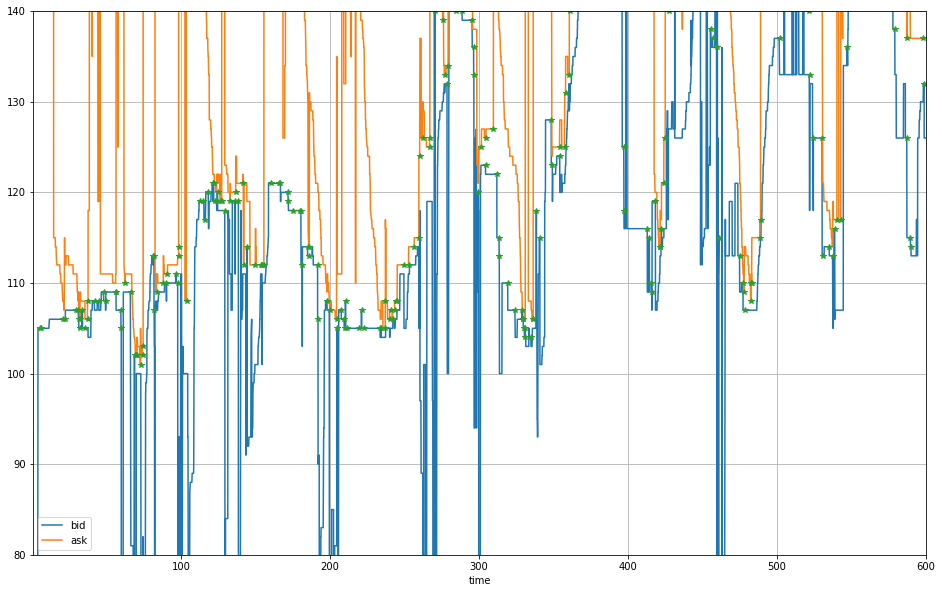

In [101]:
prices.plot(x='time', y=['bid', 'ask'], figsize=(16, 10))
plt.plot(trades['time'], trades['price'], '*', label='trades')
plt.ylim([80, 140])
plt.grid()

# Features

### Bid, Ask, Mid

In [122]:
def make_bid(log):
    return pd.Series([foo[1]['bids']['best'] for foo in log], index=[foo[0] for foo in log])

def make_ask(log):
    return pd.Series([foo[1]['asks']['best'] for foo in log], index=[foo[0] for foo in log])

def make_mid(log):
    return 0.5 * (make_bid(log) + make_ask(log))

In [126]:
foo = pd.Series(prices['bid'].values, index=prices['time'])
(make_bid(log) - foo).describe()

count    6963.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

### Book Price

In [82]:
def book_price(qty, bids, asks):
    def impl(lob, sign):
        tot_price = 0
        tot_size = 0
        level = 0 if sign > 0 else len(lob) - 1
        while tot_size < qty and level >= 0 and level < len(lob):
            lv_price = lob[level][0]
            lv_size = lob[level][1]
            eff_size = lv_size if lv_size < qty - tot_size else qty - tot_size
            tot_price += eff_size * lv_price
            tot_size += eff_size
            level += sign
        if tot_size == qty:
            return tot_price / tot_size
        else:
            return None
    bp = impl(bids, -1)
    ap = impl(asks, 1)
    if bp is None or ap is None:
        return None
    else:
        return 0.5 * (bp + ap)

In [83]:
book_price(1, [[95, 1], [97, 1], [99, 1]], [[101, 1], [102, 1], [103, 1]])

100.0

In [84]:
book_price(3, [[95, 1], [97, 1], [99, 1]], [[101, 1], [102, 1], [103, 1]])

99.5

In [102]:
log[50]

(14.636363636363818,
 {'asks': {'best': 115, 'lob': [[115, 1]], 'n': 1, 'worst': 1000},
  'bids': {'best': 106,
   'lob': [[74, 1], [97, 1], [105, 1], [106, 2]],
   'n': 5,
   'worst': 1},
  'time': 14.636363636363818},
 None)

In [103]:
foo = log[107][1]
print(foo)
book_price(3, foo['bids']['lob'], foo['asks']['lob'])

{'time': 19.424242424242742, 'asks': {'worst': 1000, 'lob': [[110, 1], [118, 1], [677, 1], [793, 1], [832, 1]], 'best': 110, 'n': 5}, 'bids': {'worst': 1, 'lob': [[27, 1], [74, 1], [80, 1], [96, 1], [97, 1], [105, 1], [106, 3]], 'best': 106, 'n': 9}}


203.83333333333334

In [85]:
def make_book_price(log, qty):
    return pd.Series(
        [book_price(qty, foo[1]['bids']['lob'], foo[1]['asks']['lob']) for foo in log],
        index=[foo[0] for foo in log])

In [104]:
bp_vals = pd.DataFrame({
    'time': prices['time'],
    'book_price': [book_price(3, foo[1]['bids']['lob'], foo[1]['asks']['lob']) for foo in log]
}, index=prices.index)

In [105]:
bp_vals = make_book_price(log, 3)

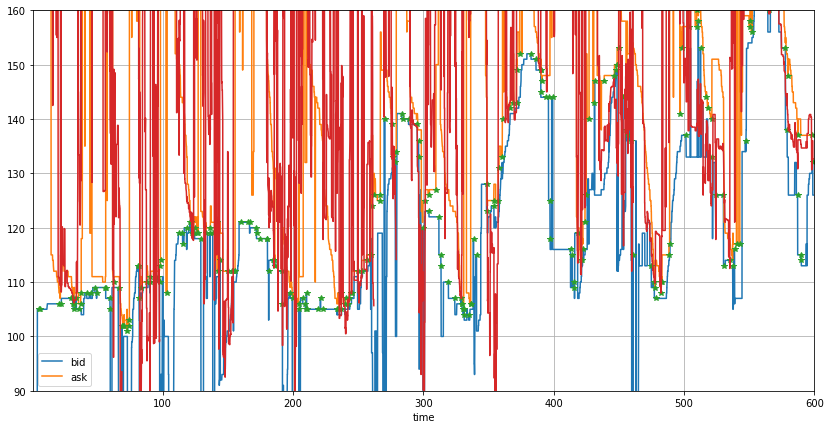

In [107]:
prices.plot(x='time', y=['bid', 'ask'], figsize=(14, 7))
plt.plot(trades['time'], trades['price'], '*', label='trades')
plt.plot(bp_vals.index, bp_vals)
plt.ylim([90, 160])
plt.grid()

### EMA

In [71]:
def ema(series, dur, reset_on_nan=False):
    def gen():
        last = np.nan
        last_t = np.nan
        last_v = np.nan
        for t, v in zip(series.index, series):
            # Decay towards last_v
            if np.isfinite(last_v):
                # last must also be finite
                k = np.exp((last_t - t) / dur)
                last = last * k + last_v * (1 - k)
            # Process NaNs
            if not np.isfinite(v) and reset_on_nan:
                last = v
            if not np.isfinite(last) and np.isfinite(v):
                last = v
            # Remember state
            last_v = v
            last_t = t
            yield last
    return pd.Series(gen(), index=series.index)

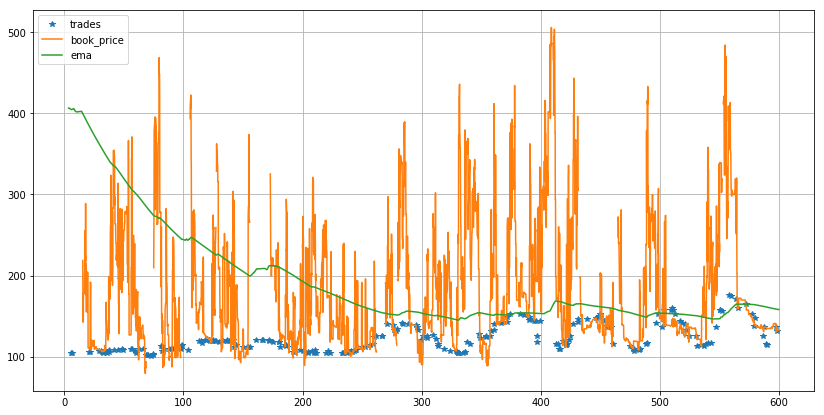

In [108]:
foo = ema(make_book_price(log, 1), 100)
plt.figure(figsize=(14, 7))
#prices.plot(x='time', y=['bid', 'ask'], figsize=(14, 7))
plt.plot(trades['time'], trades['price'], '*', label='trades')
plt.plot(bp_vals.index, bp_vals, label='book_price')
plt.plot(foo.index, foo, label='ema')
#plt.ylim([80, 140])
plt.legend()
plt.grid()

### Future Return

In [118]:
def future_value(mid, horizon):
    res = mid.reindex(mid.index + horizon, method='pad')
    res.index = mid.index
    return res

In [76]:
def future_return(mid, horizon):
    return mid.reindex(mid.index + horizon, method='pad').values - mid

In [120]:
def conservative_future_return(bid, ask, horizon):
    pos_part = future_value(bid, horizon) - ask
    pos_part = pos_part.where(pos_part > 0, other=0.0)
    neg_part = future_value(ask, horizon) - bid
    neg_part = neg_part.where(neg_part < 0, other=0.0)
    return pos_part + neg_part

In [121]:
conservative_future_return(pd.Series(np.arange(12)), pd.Series(np.arange(1, 13)), 3)

0     2.0
1     2.0
2     2.0
3     2.0
4     2.0
5     2.0
6     2.0
7     2.0
8     2.0
9     1.0
10    0.0
11    0.0
dtype: float64

### Is book_price predictive of future return?

In [129]:
logs = [market_data() for i in range(100)]

[TID B00 type GVWY balance 0.0 blotter [] orders []]
[TID B01 type SHVR balance 0.0 blotter [] orders []]
[TID B02 type ZIC balance 0.0 blotter [] orders []]
[TID B03 type ZIP balance 0.0 blotter [] orders []]
[TID B04 type GVWY balance 0.0 blotter [] orders []]
[TID B05 type ZIC balance 0.0 blotter [] orders []]
[TID B06 type ZIP balance 0.0 blotter [] orders []]
[TID B07 type GVWY balance 0.0 blotter [] orders []]
[TID B08 type ZIP balance 0.0 blotter [] orders []]
[TID B09 type ZIC balance 0.0 blotter [] orders []]
[TID B10 type ZIP balance 0.0 blotter [] orders []]
[TID B11 type SHVR balance 0.0 blotter [] orders []]
[TID B12 type SHVR balance 0.0 blotter [] orders []]
[TID B13 type ZIC balance 0.0 blotter [] orders []]
[TID B14 type SHVR balance 0.0 blotter [] orders []]
[TID B15 type GVWY balance 0.0 blotter [] orders []]
[TID S00 type SHVR balance 0.0 blotter [] orders []]
[TID S01 type ZIC balance 0.0 blotter [] orders []]
[TID S02 type ZIP balance 0.0 blotter [] orders []]
[TI

[TID S10 type GVWY balance 0.0 blotter [] orders []]
[TID S11 type ZIC balance 0.0 blotter [] orders []]
[TID S12 type GVWY balance 0.0 blotter [] orders []]
[TID S13 type ZIC balance 0.0 blotter [] orders []]
[TID S14 type ZIP balance 0.0 blotter [] orders []]
[TID S15 type GVWY balance 0.0 blotter [] orders []]
[TID B00 type ZIP balance 0.0 blotter [] orders []]
[TID B01 type ZIC balance 0.0 blotter [] orders []]
[TID B02 type SHVR balance 0.0 blotter [] orders []]
[TID B03 type GVWY balance 0.0 blotter [] orders []]
[TID B04 type GVWY balance 0.0 blotter [] orders []]
[TID B05 type SHVR balance 0.0 blotter [] orders []]
[TID B06 type GVWY balance 0.0 blotter [] orders []]
[TID B07 type GVWY balance 0.0 blotter [] orders []]
[TID B08 type ZIP balance 0.0 blotter [] orders []]
[TID B09 type ZIC balance 0.0 blotter [] orders []]
[TID B10 type ZIP balance 0.0 blotter [] orders []]
[TID B11 type SHVR balance 0.0 blotter [] orders []]
[TID B12 type ZIC balance 0.0 blotter [] orders []]
[T

[TID S04 type ZIP balance 0.0 blotter [] orders []]
[TID S05 type SHVR balance 0.0 blotter [] orders []]
[TID S06 type ZIP balance 0.0 blotter [] orders []]
[TID S07 type GVWY balance 0.0 blotter [] orders []]
[TID S08 type ZIC balance 0.0 blotter [] orders []]
[TID S09 type SHVR balance 0.0 blotter [] orders []]
[TID S10 type ZIP balance 0.0 blotter [] orders []]
[TID S11 type SHVR balance 0.0 blotter [] orders []]
[TID S12 type ZIP balance 0.0 blotter [] orders []]
[TID S13 type ZIC balance 0.0 blotter [] orders []]
[TID S14 type GVWY balance 0.0 blotter [] orders []]
[TID S15 type GVWY balance 0.0 blotter [] orders []]
[TID B00 type ZIP balance 0.0 blotter [] orders []]
[TID B01 type SHVR balance 0.0 blotter [] orders []]
[TID B02 type ZIP balance 0.0 blotter [] orders []]
[TID B03 type ZIC balance 0.0 blotter [] orders []]
[TID B04 type ZIP balance 0.0 blotter [] orders []]
[TID B05 type ZIC balance 0.0 blotter [] orders []]
[TID B06 type SHVR balance 0.0 blotter [] orders []]
[TID

[TID S05 type ZIP balance 0.0 blotter [] orders []]
[TID S06 type ZIP balance 0.0 blotter [] orders []]
[TID S07 type ZIC balance 0.0 blotter [] orders []]
[TID S08 type SHVR balance 0.0 blotter [] orders []]
[TID S09 type SHVR balance 0.0 blotter [] orders []]
[TID S10 type GVWY balance 0.0 blotter [] orders []]
[TID S11 type ZIP balance 0.0 blotter [] orders []]
[TID S12 type SHVR balance 0.0 blotter [] orders []]
[TID S13 type GVWY balance 0.0 blotter [] orders []]
[TID S14 type ZIC balance 0.0 blotter [] orders []]
[TID S15 type GVWY balance 0.0 blotter [] orders []]
[TID B00 type GVWY balance 0.0 blotter [] orders []]
[TID B01 type GVWY balance 0.0 blotter [] orders []]
[TID B02 type ZIP balance 0.0 blotter [] orders []]
[TID B03 type ZIP balance 0.0 blotter [] orders []]
[TID B04 type GVWY balance 0.0 blotter [] orders []]
[TID B05 type SHVR balance 0.0 blotter [] orders []]
[TID B06 type ZIP balance 0.0 blotter [] orders []]
[TID B07 type ZIC balance 0.0 blotter [] orders []]
[T

[TID S10 type SHVR balance 0.0 blotter [] orders []]
[TID S11 type SHVR balance 0.0 blotter [] orders []]
[TID S12 type ZIP balance 0.0 blotter [] orders []]
[TID S13 type ZIP balance 0.0 blotter [] orders []]
[TID S14 type SHVR balance 0.0 blotter [] orders []]
[TID S15 type ZIC balance 0.0 blotter [] orders []]
[TID B00 type ZIP balance 0.0 blotter [] orders []]
[TID B01 type GVWY balance 0.0 blotter [] orders []]
[TID B02 type SHVR balance 0.0 blotter [] orders []]
[TID B03 type GVWY balance 0.0 blotter [] orders []]
[TID B04 type GVWY balance 0.0 blotter [] orders []]
[TID B05 type ZIP balance 0.0 blotter [] orders []]
[TID B06 type SHVR balance 0.0 blotter [] orders []]
[TID B07 type SHVR balance 0.0 blotter [] orders []]
[TID B08 type ZIC balance 0.0 blotter [] orders []]
[TID B09 type ZIC balance 0.0 blotter [] orders []]
[TID B10 type GVWY balance 0.0 blotter [] orders []]
[TID B11 type ZIC balance 0.0 blotter [] orders []]
[TID B12 type SHVR balance 0.0 blotter [] orders []]
[

[TID S03 type ZIP balance 0.0 blotter [] orders []]
[TID S04 type ZIP balance 0.0 blotter [] orders []]
[TID S05 type ZIC balance 0.0 blotter [] orders []]
[TID S06 type ZIC balance 0.0 blotter [] orders []]
[TID S07 type GVWY balance 0.0 blotter [] orders []]
[TID S08 type GVWY balance 0.0 blotter [] orders []]
[TID S09 type SHVR balance 0.0 blotter [] orders []]
[TID S10 type ZIC balance 0.0 blotter [] orders []]
[TID S11 type ZIC balance 0.0 blotter [] orders []]
[TID S12 type GVWY balance 0.0 blotter [] orders []]
[TID S13 type GVWY balance 0.0 blotter [] orders []]
[TID S14 type SHVR balance 0.0 blotter [] orders []]
[TID S15 type SHVR balance 0.0 blotter [] orders []]
[TID B00 type GVWY balance 0.0 blotter [] orders []]
[TID B01 type GVWY balance 0.0 blotter [] orders []]
[TID B02 type SHVR balance 0.0 blotter [] orders []]
[TID B03 type GVWY balance 0.0 blotter [] orders []]
[TID B04 type ZIC balance 0.0 blotter [] orders []]
[TID B05 type GVWY balance 0.0 blotter [] orders []]


[TID B00 type SHVR balance 0.0 blotter [] orders []]
[TID B01 type ZIC balance 0.0 blotter [] orders []]
[TID B02 type GVWY balance 0.0 blotter [] orders []]
[TID B03 type ZIP balance 0.0 blotter [] orders []]
[TID B04 type ZIC balance 0.0 blotter [] orders []]
[TID B05 type SHVR balance 0.0 blotter [] orders []]
[TID B06 type ZIP balance 0.0 blotter [] orders []]
[TID B07 type GVWY balance 0.0 blotter [] orders []]
[TID B08 type SHVR balance 0.0 blotter [] orders []]
[TID B09 type ZIC balance 0.0 blotter [] orders []]
[TID B10 type ZIC balance 0.0 blotter [] orders []]
[TID B11 type SHVR balance 0.0 blotter [] orders []]
[TID B12 type ZIP balance 0.0 blotter [] orders []]
[TID B13 type ZIP balance 0.0 blotter [] orders []]
[TID B14 type GVWY balance 0.0 blotter [] orders []]
[TID B15 type GVWY balance 0.0 blotter [] orders []]
[TID S00 type GVWY balance 0.0 blotter [] orders []]
[TID S01 type SHVR balance 0.0 blotter [] orders []]
[TID S02 type ZIP balance 0.0 blotter [] orders []]
[T

[TID B00 type GVWY balance 0.0 blotter [] orders []]
[TID B01 type GVWY balance 0.0 blotter [] orders []]
[TID B02 type ZIP balance 0.0 blotter [] orders []]
[TID B03 type ZIP balance 0.0 blotter [] orders []]
[TID B04 type ZIP balance 0.0 blotter [] orders []]
[TID B05 type ZIC balance 0.0 blotter [] orders []]
[TID B06 type ZIC balance 0.0 blotter [] orders []]
[TID B07 type GVWY balance 0.0 blotter [] orders []]
[TID B08 type ZIP balance 0.0 blotter [] orders []]
[TID B09 type SHVR balance 0.0 blotter [] orders []]
[TID B10 type ZIC balance 0.0 blotter [] orders []]
[TID B11 type SHVR balance 0.0 blotter [] orders []]
[TID B12 type GVWY balance 0.0 blotter [] orders []]
[TID B13 type ZIC balance 0.0 blotter [] orders []]
[TID B14 type SHVR balance 0.0 blotter [] orders []]
[TID B15 type SHVR balance 0.0 blotter [] orders []]
[TID S00 type GVWY balance 0.0 blotter [] orders []]
[TID S01 type ZIP balance 0.0 blotter [] orders []]
[TID S02 type GVWY balance 0.0 blotter [] orders []]
[T

[TID S04 type ZIP balance 0.0 blotter [] orders []]
[TID S05 type ZIC balance 0.0 blotter [] orders []]
[TID S06 type ZIC balance 0.0 blotter [] orders []]
[TID S07 type SHVR balance 0.0 blotter [] orders []]
[TID S08 type GVWY balance 0.0 blotter [] orders []]
[TID S09 type SHVR balance 0.0 blotter [] orders []]
[TID S10 type ZIC balance 0.0 blotter [] orders []]
[TID S11 type GVWY balance 0.0 blotter [] orders []]
[TID S12 type SHVR balance 0.0 blotter [] orders []]
[TID S13 type GVWY balance 0.0 blotter [] orders []]
[TID S14 type SHVR balance 0.0 blotter [] orders []]
[TID S15 type ZIP balance 0.0 blotter [] orders []]
[TID B00 type ZIC balance 0.0 blotter [] orders []]
[TID B01 type ZIP balance 0.0 blotter [] orders []]
[TID B02 type GVWY balance 0.0 blotter [] orders []]
[TID B03 type SHVR balance 0.0 blotter [] orders []]
[TID B04 type SHVR balance 0.0 blotter [] orders []]
[TID B05 type ZIP balance 0.0 blotter [] orders []]
[TID B06 type SHVR balance 0.0 blotter [] orders []]
[

[TID S07 type GVWY balance 0.0 blotter [] orders []]
[TID S08 type ZIP balance 0.0 blotter [] orders []]
[TID S09 type GVWY balance 0.0 blotter [] orders []]
[TID S10 type ZIC balance 0.0 blotter [] orders []]
[TID S11 type ZIP balance 0.0 blotter [] orders []]
[TID S12 type ZIC balance 0.0 blotter [] orders []]
[TID S13 type ZIC balance 0.0 blotter [] orders []]
[TID S14 type GVWY balance 0.0 blotter [] orders []]
[TID S15 type ZIP balance 0.0 blotter [] orders []]
[TID B00 type ZIC balance 0.0 blotter [] orders []]
[TID B01 type GVWY balance 0.0 blotter [] orders []]
[TID B02 type ZIP balance 0.0 blotter [] orders []]
[TID B03 type SHVR balance 0.0 blotter [] orders []]
[TID B04 type GVWY balance 0.0 blotter [] orders []]
[TID B05 type ZIP balance 0.0 blotter [] orders []]
[TID B06 type SHVR balance 0.0 blotter [] orders []]
[TID B07 type ZIC balance 0.0 blotter [] orders []]
[TID B08 type GVWY balance 0.0 blotter [] orders []]
[TID B09 type ZIP balance 0.0 blotter [] orders []]
[TID

[TID S04 type SHVR balance 0.0 blotter [] orders []]
[TID S05 type SHVR balance 0.0 blotter [] orders []]
[TID S06 type ZIP balance 0.0 blotter [] orders []]
[TID S07 type ZIC balance 0.0 blotter [] orders []]
[TID S08 type GVWY balance 0.0 blotter [] orders []]
[TID S09 type ZIP balance 0.0 blotter [] orders []]
[TID S10 type ZIC balance 0.0 blotter [] orders []]
[TID S11 type GVWY balance 0.0 blotter [] orders []]
[TID S12 type SHVR balance 0.0 blotter [] orders []]
[TID S13 type ZIC balance 0.0 blotter [] orders []]
[TID S14 type GVWY balance 0.0 blotter [] orders []]
[TID S15 type GVWY balance 0.0 blotter [] orders []]
[TID B00 type ZIC balance 0.0 blotter [] orders []]
[TID B01 type ZIP balance 0.0 blotter [] orders []]
[TID B02 type SHVR balance 0.0 blotter [] orders []]
[TID B03 type GVWY balance 0.0 blotter [] orders []]
[TID B04 type ZIC balance 0.0 blotter [] orders []]
[TID B05 type GVWY balance 0.0 blotter [] orders []]
[TID B06 type SHVR balance 0.0 blotter [] orders []]
[

[TID S05 type SHVR balance 0.0 blotter [] orders []]
[TID S06 type GVWY balance 0.0 blotter [] orders []]
[TID S07 type ZIP balance 0.0 blotter [] orders []]
[TID S08 type ZIC balance 0.0 blotter [] orders []]
[TID S09 type GVWY balance 0.0 blotter [] orders []]
[TID S10 type ZIP balance 0.0 blotter [] orders []]
[TID S11 type SHVR balance 0.0 blotter [] orders []]
[TID S12 type ZIC balance 0.0 blotter [] orders []]
[TID S13 type ZIP balance 0.0 blotter [] orders []]
[TID S14 type ZIC balance 0.0 blotter [] orders []]
[TID S15 type GVWY balance 0.0 blotter [] orders []]
[TID B00 type ZIP balance 0.0 blotter [] orders []]
[TID B01 type ZIC balance 0.0 blotter [] orders []]
[TID B02 type ZIC balance 0.0 blotter [] orders []]
[TID B03 type GVWY balance 0.0 blotter [] orders []]
[TID B04 type ZIC balance 0.0 blotter [] orders []]
[TID B05 type GVWY balance 0.0 blotter [] orders []]
[TID B06 type SHVR balance 0.0 blotter [] orders []]
[TID B07 type SHVR balance 0.0 blotter [] orders []]
[TI

[TID S11 type SHVR balance 0.0 blotter [] orders []]
[TID S12 type ZIP balance 0.0 blotter [] orders []]
[TID S13 type GVWY balance 0.0 blotter [] orders []]
[TID S14 type ZIC balance 0.0 blotter [] orders []]
[TID S15 type SHVR balance 0.0 blotter [] orders []]
[TID B00 type ZIP balance 0.0 blotter [] orders []]
[TID B01 type SHVR balance 0.0 blotter [] orders []]
[TID B02 type SHVR balance 0.0 blotter [] orders []]
[TID B03 type ZIP balance 0.0 blotter [] orders []]
[TID B04 type ZIC balance 0.0 blotter [] orders []]
[TID B05 type GVWY balance 0.0 blotter [] orders []]
[TID B06 type GVWY balance 0.0 blotter [] orders []]
[TID B07 type ZIP balance 0.0 blotter [] orders []]
[TID B08 type ZIC balance 0.0 blotter [] orders []]
[TID B09 type ZIC balance 0.0 blotter [] orders []]
[TID B10 type SHVR balance 0.0 blotter [] orders []]
[TID B11 type GVWY balance 0.0 blotter [] orders []]
[TID B12 type ZIC balance 0.0 blotter [] orders []]
[TID B13 type ZIP balance 0.0 blotter [] orders []]
[TI

[TID S03 type ZIC balance 0.0 blotter [] orders []]
[TID S04 type ZIP balance 0.0 blotter [] orders []]
[TID S05 type GVWY balance 0.0 blotter [] orders []]
[TID S06 type ZIP balance 0.0 blotter [] orders []]
[TID S07 type ZIP balance 0.0 blotter [] orders []]
[TID S08 type SHVR balance 0.0 blotter [] orders []]
[TID S09 type SHVR balance 0.0 blotter [] orders []]
[TID S10 type SHVR balance 0.0 blotter [] orders []]
[TID S11 type GVWY balance 0.0 blotter [] orders []]
[TID S12 type SHVR balance 0.0 blotter [] orders []]
[TID S13 type GVWY balance 0.0 blotter [] orders []]
[TID S14 type GVWY balance 0.0 blotter [] orders []]
[TID S15 type ZIC balance 0.0 blotter [] orders []]
[TID B00 type ZIP balance 0.0 blotter [] orders []]
[TID B01 type ZIC balance 0.0 blotter [] orders []]
[TID B02 type ZIC balance 0.0 blotter [] orders []]
[TID B03 type SHVR balance 0.0 blotter [] orders []]
[TID B04 type ZIP balance 0.0 blotter [] orders []]
[TID B05 type ZIP balance 0.0 blotter [] orders []]
[TI

[TID S02 type ZIC balance 0.0 blotter [] orders []]
[TID S03 type ZIP balance 0.0 blotter [] orders []]
[TID S04 type SHVR balance 0.0 blotter [] orders []]
[TID S05 type SHVR balance 0.0 blotter [] orders []]
[TID S06 type SHVR balance 0.0 blotter [] orders []]
[TID S07 type ZIP balance 0.0 blotter [] orders []]
[TID S08 type ZIC balance 0.0 blotter [] orders []]
[TID S09 type GVWY balance 0.0 blotter [] orders []]
[TID S10 type ZIC balance 0.0 blotter [] orders []]
[TID S11 type GVWY balance 0.0 blotter [] orders []]
[TID S12 type GVWY balance 0.0 blotter [] orders []]
[TID S13 type ZIP balance 0.0 blotter [] orders []]
[TID S14 type GVWY balance 0.0 blotter [] orders []]
[TID S15 type ZIP balance 0.0 blotter [] orders []]
[TID B00 type SHVR balance 0.0 blotter [] orders []]
[TID B01 type GVWY balance 0.0 blotter [] orders []]
[TID B02 type GVWY balance 0.0 blotter [] orders []]
[TID B03 type ZIC balance 0.0 blotter [] orders []]
[TID B04 type ZIP balance 0.0 blotter [] orders []]
[T

[TID S02 type GVWY balance 0.0 blotter [] orders []]
[TID S03 type ZIP balance 0.0 blotter [] orders []]
[TID S04 type SHVR balance 0.0 blotter [] orders []]
[TID S05 type GVWY balance 0.0 blotter [] orders []]
[TID S06 type ZIP balance 0.0 blotter [] orders []]
[TID S07 type SHVR balance 0.0 blotter [] orders []]
[TID S08 type ZIC balance 0.0 blotter [] orders []]
[TID S09 type SHVR balance 0.0 blotter [] orders []]
[TID S10 type ZIP balance 0.0 blotter [] orders []]
[TID S11 type GVWY balance 0.0 blotter [] orders []]
[TID S12 type SHVR balance 0.0 blotter [] orders []]
[TID S13 type ZIC balance 0.0 blotter [] orders []]
[TID S14 type ZIC balance 0.0 blotter [] orders []]
[TID S15 type ZIC balance 0.0 blotter [] orders []]
[TID B00 type ZIC balance 0.0 blotter [] orders []]
[TID B01 type SHVR balance 0.0 blotter [] orders []]
[TID B02 type ZIP balance 0.0 blotter [] orders []]
[TID B03 type ZIP balance 0.0 blotter [] orders []]
[TID B04 type ZIC balance 0.0 blotter [] orders []]
[TID

[TID S04 type ZIP balance 0.0 blotter [] orders []]
[TID S05 type ZIC balance 0.0 blotter [] orders []]
[TID S06 type SHVR balance 0.0 blotter [] orders []]
[TID S07 type ZIP balance 0.0 blotter [] orders []]
[TID S08 type ZIC balance 0.0 blotter [] orders []]
[TID S09 type SHVR balance 0.0 blotter [] orders []]
[TID S10 type SHVR balance 0.0 blotter [] orders []]
[TID S11 type ZIC balance 0.0 blotter [] orders []]
[TID S12 type ZIP balance 0.0 blotter [] orders []]
[TID S13 type SHVR balance 0.0 blotter [] orders []]
[TID S14 type ZIC balance 0.0 blotter [] orders []]
[TID S15 type ZIP balance 0.0 blotter [] orders []]
[TID B00 type GVWY balance 0.0 blotter [] orders []]
[TID B01 type ZIP balance 0.0 blotter [] orders []]
[TID B02 type ZIC balance 0.0 blotter [] orders []]
[TID B03 type ZIC balance 0.0 blotter [] orders []]
[TID B04 type SHVR balance 0.0 blotter [] orders []]
[TID B05 type GVWY balance 0.0 blotter [] orders []]
[TID B06 type ZIP balance 0.0 blotter [] orders []]
[TID 

[TID B00 type GVWY balance 0.0 blotter [] orders []]
[TID B01 type GVWY balance 0.0 blotter [] orders []]
[TID B02 type ZIC balance 0.0 blotter [] orders []]
[TID B03 type ZIP balance 0.0 blotter [] orders []]
[TID B04 type ZIC balance 0.0 blotter [] orders []]
[TID B05 type ZIP balance 0.0 blotter [] orders []]
[TID B06 type ZIC balance 0.0 blotter [] orders []]
[TID B07 type SHVR balance 0.0 blotter [] orders []]
[TID B08 type SHVR balance 0.0 blotter [] orders []]
[TID B09 type ZIC balance 0.0 blotter [] orders []]
[TID B10 type GVWY balance 0.0 blotter [] orders []]
[TID B11 type ZIP balance 0.0 blotter [] orders []]
[TID B12 type SHVR balance 0.0 blotter [] orders []]
[TID B13 type GVWY balance 0.0 blotter [] orders []]
[TID B14 type SHVR balance 0.0 blotter [] orders []]
[TID B15 type ZIP balance 0.0 blotter [] orders []]
[TID S00 type ZIP balance 0.0 blotter [] orders []]
[TID S01 type ZIC balance 0.0 blotter [] orders []]
[TID S02 type SHVR balance 0.0 blotter [] orders []]
[TI

[TID S02 type ZIP balance 0.0 blotter [] orders []]
[TID S03 type ZIC balance 0.0 blotter [] orders []]
[TID S04 type GVWY balance 0.0 blotter [] orders []]
[TID S05 type ZIP balance 0.0 blotter [] orders []]
[TID S06 type ZIC balance 0.0 blotter [] orders []]
[TID S07 type GVWY balance 0.0 blotter [] orders []]
[TID S08 type SHVR balance 0.0 blotter [] orders []]
[TID S09 type ZIC balance 0.0 blotter [] orders []]
[TID S10 type ZIC balance 0.0 blotter [] orders []]
[TID S11 type ZIP balance 0.0 blotter [] orders []]
[TID S12 type SHVR balance 0.0 blotter [] orders []]
[TID S13 type GVWY balance 0.0 blotter [] orders []]
[TID S14 type ZIP balance 0.0 blotter [] orders []]
[TID S15 type SHVR balance 0.0 blotter [] orders []]
[TID B00 type SHVR balance 0.0 blotter [] orders []]
[TID B01 type ZIC balance 0.0 blotter [] orders []]
[TID B02 type ZIP balance 0.0 blotter [] orders []]
[TID B03 type ZIP balance 0.0 blotter [] orders []]
[TID B04 type GVWY balance 0.0 blotter [] orders []]
[TID

In [130]:
def indexed_concat(lst):
    adjusted = [datum.copy() for datum in lst]
    for i, datum in enumerate(adjusted):
        datum.index = pd.MultiIndex.from_product([[i], datum.index])
    return pd.concat(adjusted, axis=0)

In [131]:
feature = indexed_concat([make_book_price(foo, 3) - make_book_price(foo, 1) for foo in logs])
response = indexed_concat([future_return(make_book_price(foo, 1), 30) for foo in logs])

In [132]:
feature.describe()

count    682922.000000
mean         33.528604
std          50.182556
min         -40.166667
25%          -0.333333
50%           7.666667
75%          56.666667
max         292.166667
dtype: float64

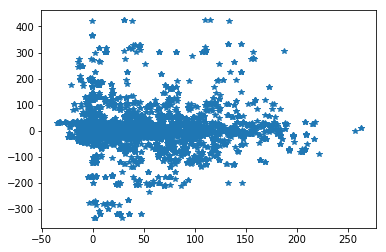

In [111]:
plt.plot(feature, response, '*')

In [150]:
def cumplot(value, order):
    if hasattr(value, 'values'):
        value = value.values
    if hasattr(order, 'values'):
        order = order.values
    inds = np.argsort(order)
    step = 1 if len(inds) < 2000 else len(inds) // 1000
    plt.plot(order[inds][::step], np.cumsum(np.nan_to_num(value[inds]))[::step])

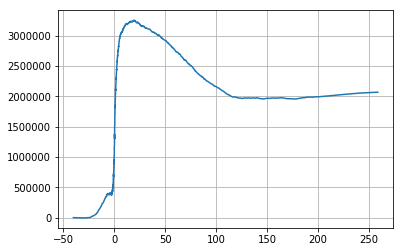

In [151]:
cumplot(response, feature)
plt.grid()

In [152]:
feature = indexed_concat([make_book_price(foo, 3) - make_book_price(foo, 1) for foo in logs])
response = indexed_concat([conservative_future_return(make_bid(foo), make_ask(foo), 30) for foo in logs])

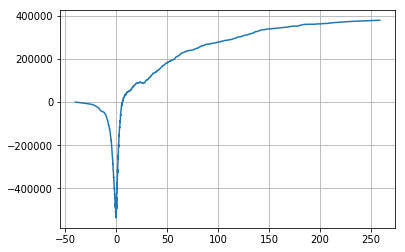

In [153]:
cumplot(response, feature)
plt.grid()

Now, this makes sense!